# Variables Research (Part II - Sales)
### `Misael Ramirez - A00821781`

<img src="autlan-logo.png" alt="Autlan logo">

In this notebook, we will perform a research for a financial forecast of variables which driver is directly related with sales. Sales are divided in the following:
1. *Mining-Metallurgical Manganese Products*
2. *Energy*
3. *Precious Metals*

Nonetheless, the contribution of the **energy** division is technically none, since the resources related with energy are used in the mines possesed by Autlán to perform the extraction of minerals, manganese for the most part. As stated in 2Q14 report: 
> "The electricity generation of the Atexcaco hydroelectric plant was favored by the constant flow of water during the dry months, so its generation grew 56%, contributing 30% of Autlán's needs and representing savings in the first half of the year of 40.2 million MXN"

**Source:** Autlan

In [17]:
# import required libraries 
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [18]:
# setting up future plots
sns.set_style(  
    "darkgrid",  
    {  
        'legend.frameon': True,  
    }  
)
mpl.rc('figure', figsize=(14, 8))

# Precious Metals (Gold) Sales Division (DIV2)

The second division represents most of Autlán's revenue which is currently 17%. **Source:** Bloomberg


## (1) GOLDS Comdty (Gold Price)  `au`

Gold is very different than Manganese when it comes to its natural properties and how it is applied in products and services, but also the they are affected by the economy also differs widely, which is also the reason why Autlán acquired Metallorum (which extracts gold).

Manganese is benefited when the overall economy is a stable growth, while gold makes the most of an economic recession (what is happening currently on FY20). Gold can be affected by several factors that will be treated as sub-variables:
1. *Economic growth (anticyclical relationship)*
2. *Investment Volume*
3. *Inflation*
4. *Central Bank's gold demand*
5. *Global Gross Domestic Product*

## (2) GLD US EQUITY (Gold ETF) `au_etf`

This is one of the most important ETFS of gold in the world with a market cap of around 78.73B USD. **Source:** Bloomberg. We will not use the price of the ETF because it mimics the price of the gold commodity, we will rely on its volume since it gives us an important elements which is the **demand of investment**. It is clear that the increase in volume means that there are more operations of acquisition for gold and that normally means that its prices is showing positive signs.

The graph clearly shows a similar tendency, and the volume of the ETF has certain signs of cyclical patterns. Nonetheless, their patterns seem alike because gold is indeed affected by the law of supply and demand because of its physical state (the same thing happened to the silicon manganese futures); despite the speculation of the investors, its physical elements cannot be out of the equation

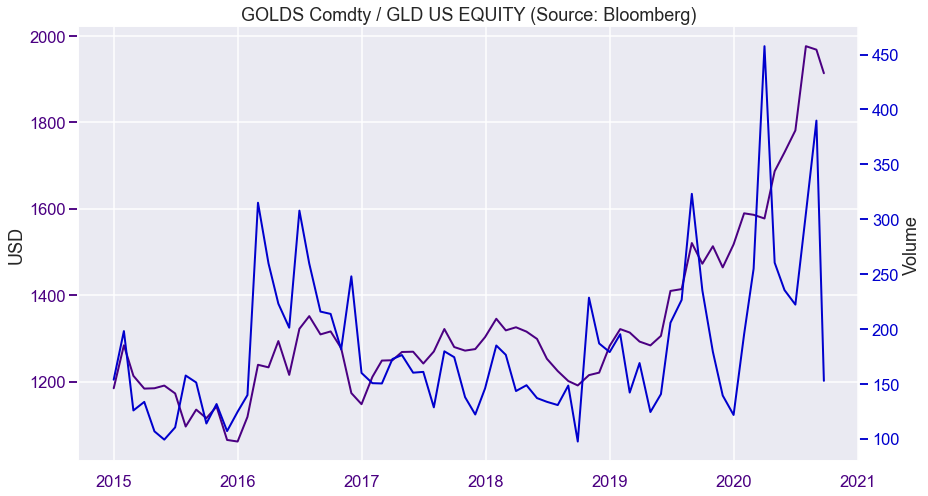

In [19]:
au = pd.read_excel('vars_au.xlsx', parse_dates=['Date'], sheet_name='Au')
au_etf = pd.read_excel('vars_au.xlsx', parse_dates=['Date'], sheet_name='Au ETF')
au_etf = au_etf.drop('Volume', axis=1)

sns.set_context("talk")

fig, ax0 = plt.subplots()

ax0.plot(au['Date'],au['Last Price'], c='indigo', linewidth=2)
ax0.tick_params(colors='indigo')
plt.ylabel('USD')

ax1 = ax0.twinx()
ax1.plot(au_etf['Date'],au_etf['Volume2'], c='mediumblue', linewidth=2)
ax1.tick_params(colors='mediumblue')
ax1.grid()
plt.ylabel('Volume')

plt.title('GOLDS Comdty / GLD US EQUITY (Source: Bloomberg)')
plt.show()

## (3) CPI (Consumer Price Index) `cpi`

Gold has always had a big correlation with the value of USD and the best way to put that in test is by measuring its purchasing power, this can be seen as inflation. This is why we use the Consumer Price Index (CPI) of the United States of America. 

Due to this relationship, we can see more clearly why gold can be considered an anticyclical investment vehicule:

> "Gold investment can also be used as a hedge against inflation and currency depreciation. Therefore, investors are showing interest in investing in the gold due to economic vulnerability"

*(Thevananth, 2019)*

When the purchasing power of the american citizen declines significantly, gold becomes a great asset in order to retain as much value as possible of your wealth. But this correlations only seem to happen in very defined cases of economic growth or turmoil. 

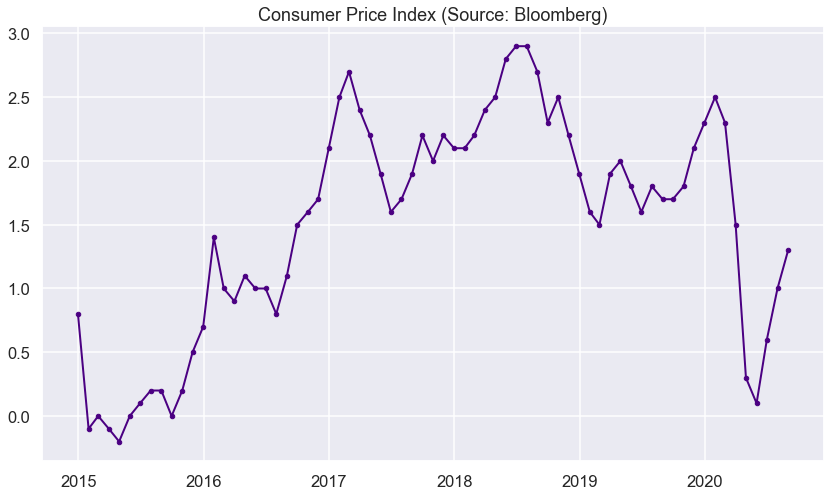

In [20]:
cpi = pd.read_excel('vars_au.xlsx', parse_dates=['Date'], sheet_name='CPI')

sns.set_context("talk")
plt.plot(cpi['Date'],cpi['Last Price'], c='indigo', marker='.', linewidth=2)
plt.title('Consumer Price Index (Source: Bloomberg)')

plt.show()

## (4) Central Banks' Gold Demand `cb`

One of the biggest movers of gold prices are central banks and their decisions still depend on the perfromance of the company, when things are going fine, they get rid of gold in order to recerive return from other assets. Unfortunately, their operations are made in such a high scale and in the least apprpiate for an individual investor it creates a big effect in gold prices, buying skyrockets the price and the selling makes it fall aggresively. The same thing can happen when big investment companies get rid of huge positions at the same time making prices volatile and going down. 

The most detailed information is presented each quarter but it can be filled forward so the frequency can be adjusted to the rest of the datasets for the sub-variables. 

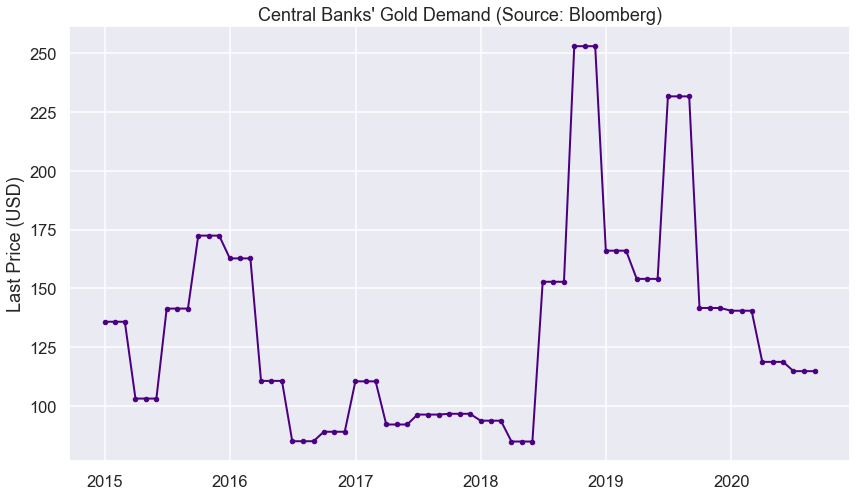

In [21]:
cb = pd.read_excel('vars_au.xlsx', parse_dates=['Date'], sheet_name='CB')

sns.set_context("talk")
plt.plot(cb['Date'],cb['Last Price'], c='indigo', marker='.', linewidth=2)
plt.title("Central Banks' Gold Demand (Source: Bloomberg)")
plt.ylabel('Last Price (USD)')

plt.show()

## (5) Global Gross Domestic Product (Global GDP) `gdp`

One of the most reliable indicators of the economic situation of the world in general can be seen in the Gross Domestic Product, which focuses on what a country produces, in this cased measured on an index to make it global-scale

>"GDP measures the monetary value of final goods and services—that is, those that are bought by the final user—pro- duced in a country in a given period of time (say a quarter or a year). It counts all the output generated within the borders of a country"

*(Callen, 2008)*

It has been stated that the COVID-19 pandemic has affected our lives and has stopped the economy in most of its branches. We can see that the negative effects are really worrying but because it wasn't an actual recession, the recovery has been very positive but there is still a path to run.

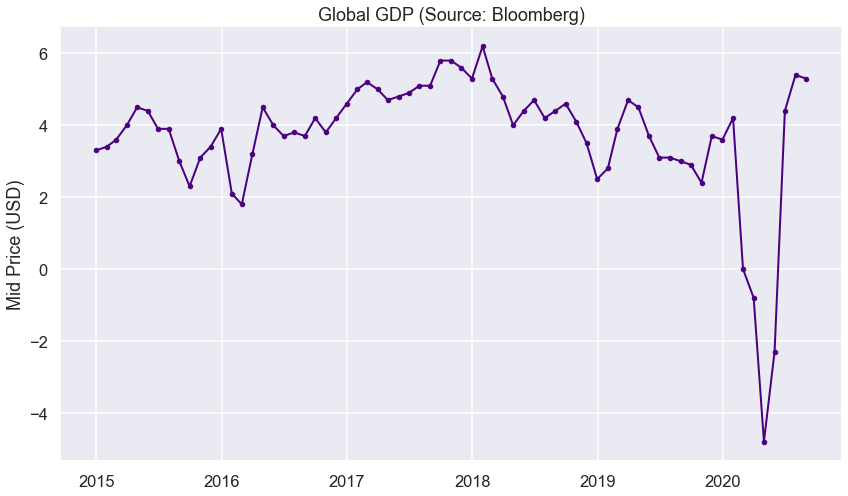

In [22]:
gdp = pd.read_excel('vars_au.xlsx', parse_dates=['Date'], sheet_name='GDP')

sns.set_context("talk")
plt.plot(gdp['Date'],gdp['Mid Price'], c='indigo', marker='.', linewidth=2)
plt.title("Global GDP (Source: Bloomberg)")
plt.ylabel('Mid Price (USD)')

plt.show()

## Relationship between sub-variables for `au`

The next step is to analyze the relationship between all sub-variables and filter the ones that are more statistically significat and explain better the movements of the average spot price of gold `au`. In order to do that, we proceed to put all data in a single dataframe and filtering data before FY20 and for FY20 only. Let's recall all data shares the same period and frequency, since we are seeking to have the highest amount of observations for the correlations and multinear regressions of ordinary least squares

In [23]:
# putting all sub-variblles together
data = pd.merge(au, au_etf, on='Date')
data = pd.merge(data, cpi, on='Date')
data = pd.merge(data, cb, on='Date')
data = pd.merge(data, gdp, on='Date')

# renaming columns
data.columns = ['Date', 'au', 'au_etf', 'cpi', 'cb', 'gdp']
data['Date'] = pd.to_datetime(data['Date'], format='%Y%m%d')

# filtering data before 2020: 2014-2019
df = data.loc[data['Date']<'2020']
# filtering data after 2019: 2020
df_20 = data.loc[data['Date']>'2020']
df_20.head()

,Date,au,au_etf,cpi,cb,gdp
43,2020-01-31,1589.16,195.180000,2.5,140.45,4.2
44,2020-03-31,1577.18,457.649984,1.5,118.68,-0.8
45,2020-04-30,1686.50,260.330000,0.3,118.68,-4.8
46,2020-06-30,1780.96,222.150000,0.6,114.74,4.4
47,2020-07-31,1975.86,305.200000,1.0,114.74,5.4


## Correlation between predictors for `au`

The varible we are trying to predict in a sense is `au`. The correlation it has with all the sub-variables is fairly good with two sub-variables. The ETF volume has some effect in the price, maybe more because of the market capitalization than its actual investment demand. Despite the inflation not being a direct correlation with the price of gold, the volatile economic growth in the last years has been significant (situations where gold is actually influenced). 

The central banks transactions do have an effect in the gold of price, but due to their static transactions they cannot predict the cnstantly changin prices of gold in a monthly frequency. The gdp relies and much more factor that go beyond the price of gold, although it is interesting to see that inflation is a bigfer factorin the levels of GDP than gold price itself. For the model, we will only rely in the gold ETF and the Consumer Price Index.

But the cpi has a positive correlation, despite the negative relationship that was previosuly mentioned, this means that cpi works better as an economic situation indicator than a currency strenght factor

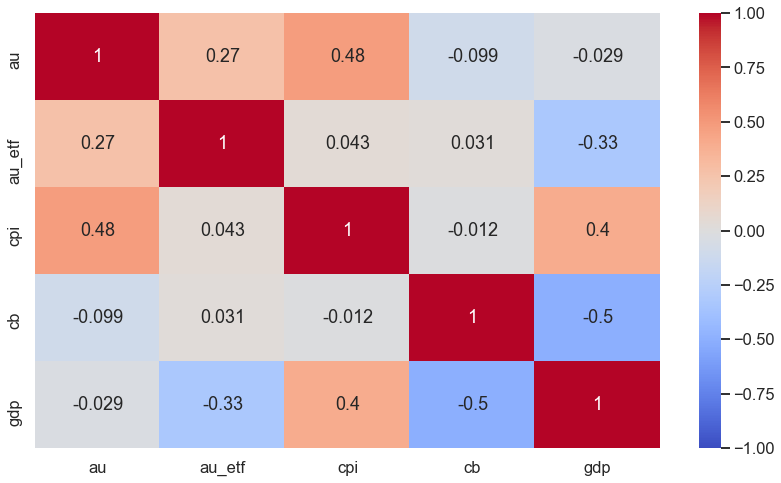

In [24]:
# create correlation
corr = df.corr()

# create heatmap based on correlation
sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center= 0, cmap='coolwarm')
plt.show()

## Collinearity of predictors for `au`

All `au` and `au_etf` together are `VIF > 10`, which means that the ETF will fight in the model to explain the predictor. We should see further in the model how it affect the overall regression and statistical significance

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

data_vif = df.copy()
data_vif = data_vif.drop(['Date', 'cb', 'gdp'], axis=1)

for i in range(len(data_vif.columns)):
    v = vif(np.matrix(data_vif),i)
    print("VIF for {}: {}".format(data_vif.columns[i],round(v,2)))

VIF for au: 19.45
VIF for au_etf: 13.96
VIF for cpi: 5.11


# Linear Regression for `au`

The dataset will be reduced to only `au`, `au_etf`, `cpi`, since the other variables' correlations were very low

The variance in the data is pretty different between predictors, so we proceed to scale the data.

In [26]:
df_reg = df.copy()

# we prepare the data for the model
df_reg = df.drop('Date', axis=1)
df_reg = df_reg.drop(['cb', 'gdp'], axis=1)
display(df_reg.head())
print(np.std(df_reg))

,au,au_etf,cpi
0,1184.36,153.72,0.8
1,1183.57,133.48,-0.1
2,1184.37,106.64,-0.2
3,1172.35,110.27,0.1
4,1095.80,157.50,0.2


au        99.557908
au_etf    49.655878
cpi        0.841931
dtype: float64


In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

df1 = df_reg.copy()

# scale gold price data
float_array = df1['au'].values.reshape(-1, 1)
scaler = StandardScaler().fit(float_array)
scaler = scaler.transform(float_array)
df_au = pd.DataFrame(scaler)

# scale gold etf data
float_array = df1['au_etf'].values.reshape(-1, 1)
scaler = StandardScaler().fit(float_array)
scaler = scaler.transform(float_array)
df_auetf = pd.DataFrame(scaler)

# scale cpi data
float_array = df1['cpi'].values.reshape(-1, 1)
scaler = StandardScaler().fit(float_array)
scaler = scaler.transform(float_array)
df_cpi = pd.DataFrame(scaler)

# concat the new scaled data
df_s = pd.concat([df_au, df_auetf],axis=1, ignore_index=True, sort=False)
df_s = pd.concat([df_s, df_cpi], axis=1, ignore_index=True, sort=False)
df_s = pd.concat([df1, df_s], axis=1, ignore_index=True, sort=False )
df_s.columns = ['au', 'au_etf', 'cpi','au_s', 'au_etf_s', 'cpi_s']
df_s.head()

,au,au_etf,cpi,au_s,au_etf_s,cpi_s
0,1184.36,153.72,0.8,-0.763746,-0.344941,-0.906001
1,1183.57,133.48,-0.1,-0.771681,-0.752547,-1.974972
2,1184.37,106.64,-0.2,-0.763646,-1.293067,-2.093747
3,1172.35,110.27,0.1,-0.884380,-1.219964,-1.737423
4,1095.80,157.50,0.2,-1.653279,-0.268818,-1.618649


##  Multilinear Regression Model: `au_etf` and `cpi` for `au`

In the end, the scalation of data didn't really make a difference in the end, so we used the normal sub-variables. The model explains a high percentage of the price of gold and the statistic significance of the ETF volume and the inflation in the United States is good enough. The ETF is directly correlated to the gold price, probably because of the huge market cap it pocesses which might have an effect central bank-like while the CPI worked as a measure for the situation of the economy using the United States since the dollar position is related with gold (when its price power diminishes, it is best to rely on assets that keep an steay value such as such as gold, silver, among others.).

In [28]:
# import required libraries
import statsmodels.api as sm
from sklearn.preprocessing import scale

# prepare data
X = df_s.loc[:, ['au_etf', 'cpi']].values
y = df_s['au'].values.ravel()

# create model
reg = sm.OLS(y, X)
results = reg.fit()

# print results
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.946
Method:                 Least Squares   F-statistic:                              378.2
Date:                Thu, 24 Sep 2020   Prob (F-statistic):                    3.77e-27
Time:                        13:30:23   Log-Likelihood:                         -304.32
No. Observations:                  43   AIC:                                      612.6
Df Residuals:                      41   BIC:                                      616.2
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

---
## Quantitative conclusions

-DFFF
-SSDD

---

## Average Spot Price for 2020

$$ {Y_{au}} = \alpha + \beta_{1}({etf}_{1}) + \beta_{2}({cip}_{2}) +  \epsilon $$

We will follow the same dynamic in the previous linear regressions, but now the FY20 data will be added and considered test data once the training data (FY15-FY19) is fitted in the model

In [29]:
# import required libraries
from sklearn.linear_model import LinearRegression 

# load data
X_train = df_s.loc[:, ['au_etf', 'cpi']].values
X_test = df_20.loc[:,['au_etf', 'cpi']].values
Y_train = df_s['au'].values.ravel()

# create model
reg = LinearRegression()
reg.fit(X_train,Y_train)
y_pred = reg.predict(X_test)

print('Predicted Spot Price of Gold FY20: {}'.format(y_pred))
print('Predicted Average Spot Price FY20: {}'.format(np.mean(y_pred)))

Predicted Spot Price of Gold FY20: [1324.8281914  1398.74755813 1234.05923756 1231.9461556  1295.38784104
 1354.0204075 ]
Predicted Average Spot Price FY20: 1306.498231872326


## Estimation of FY20 Sales by Comparing Predicted Values w/ real data

We will compare the actual revenue Autlán generated each year along with the average spot price of manganese with the predicted average spot price of manganese in order to create as estimation of future sales

The predicted sales based on the chosen model displays $ 43.81 (millions USD), although there is one element that wasn't considered in the model: COVID-19 and the economic slowdown (even despite using FY20 data). The data for the model was pre COVID-19, which means that there wasn't any data that represent economic turmoil that could represent recession results. Shortly, the predicted sales just follow the tendency based on the price of manganese but it is not affected by the clear economic slowdown that will continue for a few more years and that will be explained and anayzed in `the total_sales` notebook. Nonetheless, the model helped us understand what actually moves the prices of gold and create a precise quantitative analysis.

In order to solve that extraordinary factor, we considered that the sales from the model should be increased significantly, about 40% based on last year's sales.

$$93.5 · 1.4 = 130.85$$

### The predicted Sales FY20 (Gold Division) is: `$ 130.85 (million USD)`

In [31]:
# import required libraries
from sklearn.linear_model import LinearRegression 

# create data for model
Y_train = pd.read_excel('vars_au.xlsx', sheet_name='Gold Sales', usecols=['Sales']).values
X_train = pd.read_excel('vars_au.xlsx', sheet_name='Gold Sales', usecols=['Gold Price'])
X_train = X_train.values
X_test = np.array([1806.498231872326]).reshape(-1, 1)

print('Sales FY2018-FY2019:\n{}'.format(Y_train))
print('Manganese Last Price FY2018-FY2019:\n{}'.format(X_train))
print('Predicted Manganese Price: {}'.format(X_test))

# create model
reg = LinearRegression()
reg.fit(X_train,Y_train)
y_pred = reg.predict(X_test)
print('Sales FY20: {}'.format(y_pred))

Sales FY2018-FY2019:
[[38.148]
 [93.462]]
Manganese Last Price FY2018-FY2019:
[[1282.49]
 [1517.27]]
Predicted Manganese Price: [[1806.49823187]]
Sales FY20: [[161.60396447]]


---
# References

## The Relationship Between Inflation and Gold Price: Evidence From Sri Lanka
### Thevananth, J

## What Is   Gross Domestic Product?
### Callen, T